# <center>***模型评价***</center>
<br><br><br>

模型评价分为两个部分：

- 性能评估：评估模型预测的好不好、准不准
- 灵敏度分析：评估模型抗干扰（噪音）的能力强不强

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df_reg = pd.read_excel("data\\boston_house_prices.xlsx")
df_reg.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [44]:
df_cls = pd.read_excel("data\\breast_cancer.xlsx")
df_cls.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [45]:
# 选取波士顿房价数据集的特征空间和标签
X1 = df_reg.drop("MEDV", axis=1)
y1 = df_reg.MEDV

# 划分数据集为训练集和测试集
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# 选取乳腺癌数据集的特征空间和标签
X2 = df_cls.drop("y", axis=1)
y2 = df_cls.y

# 划分数据集为训练集和测试集
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

## ***模型建立***

In [46]:
Model1 = SVR()
# 回归模型预测结果
y1_pred = Model1.fit(X1_train, y1_train).predict(X1_test)

Model2 = SVC(probability=True)
# 分类模型预测结果
y2_pred = Model2.fit(X2_train, y2_train).predict(X2_test)

## ***模型评价***

### **回归模型评价**

你们用的时候在论文里加上二者的数学原理（公式），每个一个公式。

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i |
$$

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

需要注意两个点：

- 两个指标都是越小越好：MAE和MSE的值越小，说明模型的预测结果越接近真实值，模型的性能越好
- 两个指标只能在同一数据集上比较：MAE和MSE的值在不同的数据集上可能不同，因此不能直接比较不同数据集上的MAE和MSE值

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Mean Squared Error（MAE：均方误差）
print(mean_squared_error(y1_test, y1_pred))

# Mean Absolute Error（MSE：平均绝对误差）
print(mean_absolute_error(y1_test, y1_pred))

52.8383657679667
4.530585721759495


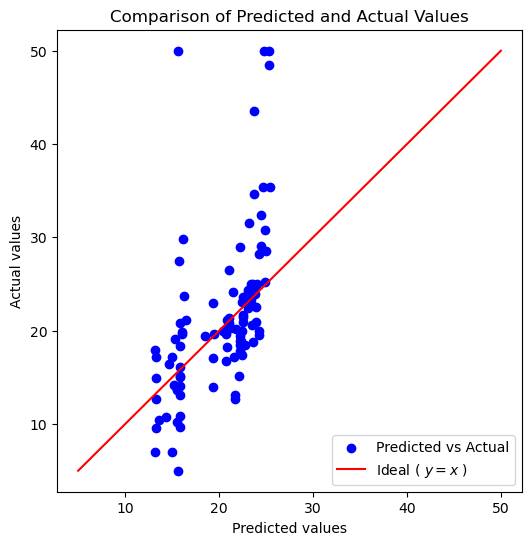

In [48]:
# 创建一个正方形的图形  
plt.figure(figsize=(6, 6))  
  
# 绘制散点图  
plt.scatter(y1_pred, y1_test, color='blue', label='Predicted vs Actual')  
  
# 绘制理想情况（y=x）的折线图  
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], color="red", label='Ideal ( $y=x$ )')  
  
# 添加图例
plt.legend()  
  
# 设置坐标轴标签  
plt.xlabel('Predicted values')  
plt.ylabel('Actual values')  
  
# 设置标题  
plt.title('Comparison of Predicted and Actual Values')  
  
# 显示图形  
plt.show()

### **分类模型评价**

左边这个图叫做混淆矩阵热力图，右边那个叫做ROC曲线图，ROC曲线图只能在二分类用
，多分类的话用不了

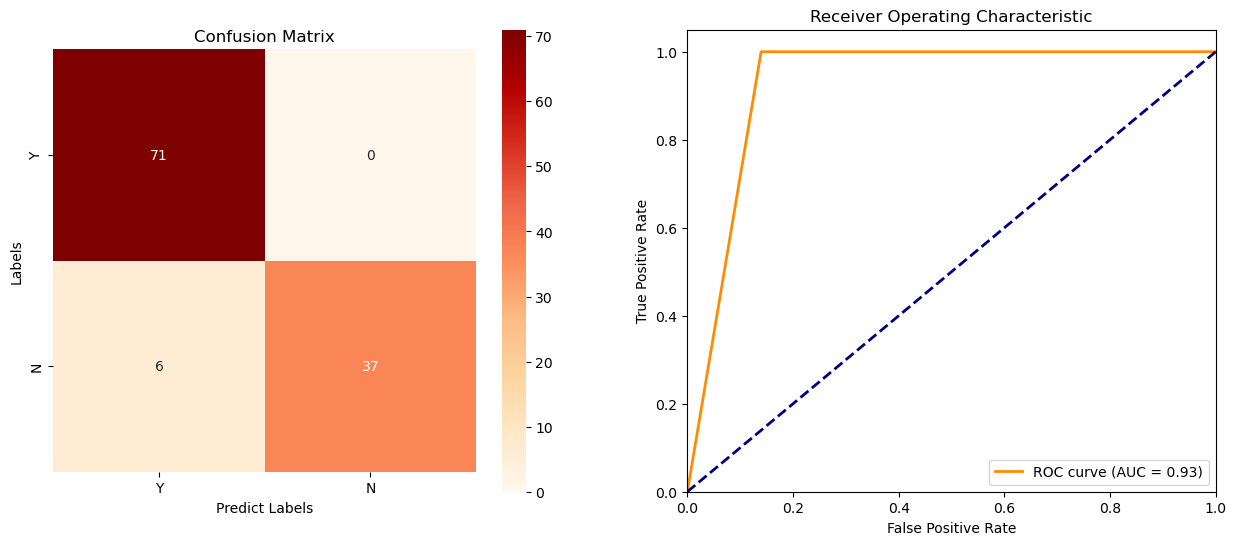

In [49]:
from sklearn.metrics import confusion_matrix

# 虽然这个混淆矩阵是个 array 没有标签，但对应的标签就是按我下面labels的顺序排列的
mat = confusion_matrix(y2_test, y2_pred, labels=[1, 0])

# 计算AUC和ROC曲线下的面积(AUC value)和横坐标为fpr,纵坐标为tpr的点
auc_value = metrics.roc_auc_score(y2_test, y2_pred)
fpr, tpr, _ = metrics.roc_curve(y2_test, y2_pred)
roc_auc_point = auc(fpr, tpr)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.heatmap(mat, annot=True, square="equal", cmap="OrRd", ax=ax[0],
    xticklabels=["Y", "N"], 
    yticklabels=["Y", "N"])
ax[0].set_xlabel("Predict Labels")
ax[0].set_ylabel("Labels")
ax[0].set_title("Confusion Matrix")

ax[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_point)
ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


In [50]:
from sklearn.metrics import classification_report

# 打印分类模型最好的评价系统
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



## ***灵敏度分析***

In [51]:
df = pd.read_excel("data\\iris.xlsx")
df.head()

,X1,X2,X3,X4,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
# 选取波士顿房价数据集的特征空间和标签
X = df.drop("class", axis=1)
y = df['class']

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC(probability=True)
clf.fit(X_train, y_train)

SVC(probability=True)

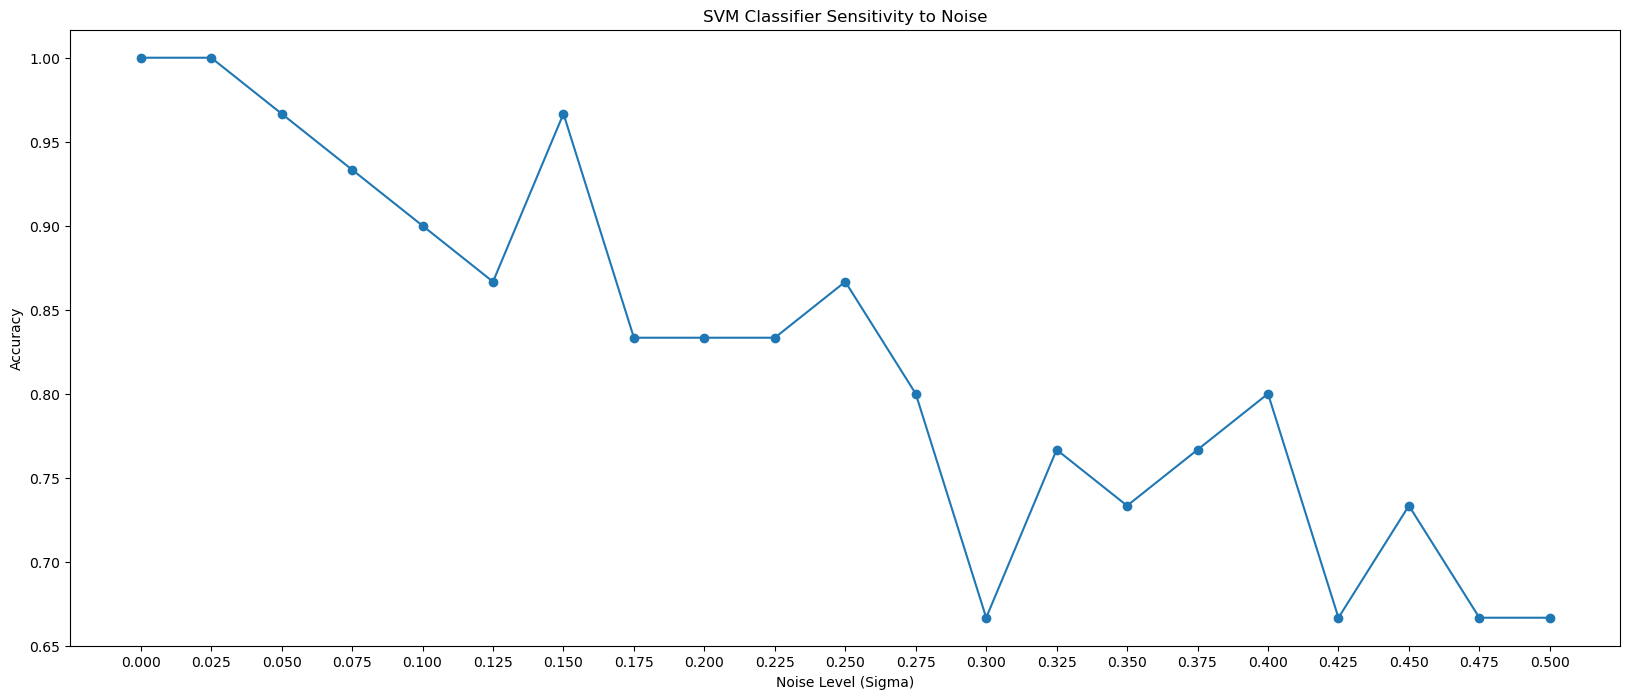

In [53]:
from sklearn.metrics import accuracy_score


def add_noise(X, sigma):  
    """在特征X上添加高斯噪声"""  
    return X * (1 + sigma * np.random.randn(*X.shape))

# 定义一个sigma值的范围  
sigmas = np.linspace(0, 0.5, 21)  # 假设我们测试从0到0.5的20个sigma值  
accuracies = []  

for sigma in sigmas:  
    X_test_noisy = add_noise(X_test, sigma)  
    y_pred = clf.predict(X_test_noisy)  
    # 若为分类模型，使用accuracy_score，若为回归模型，使用MAE
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)


plt.figure(figsize=(20, 8))  
plt.plot(sigmas, accuracies, marker='o')  
plt.title('SVM Classifier Sensitivity to Noise')  
plt.xticks(sigmas)
plt.xlabel('Noise Level (Sigma)')  
plt.ylabel('Accuracy')  
plt.show()